In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('extracted_data_stocks.xlsx')

In [13]:
data.columns

Index(['Unnamed: 0', 'Stock', 'Volatility', 'Beta', 'Sharpe_Ratio',
       'Max_Drawdown', 'PE_Ratio', 'EPS', '50_MA_Last', '200_MA_Last',
       'Number_of_news_headlines', 'Average_sentiment_score', 'Beta_1',
       'Beta_2', 'Beta_3', 'Beta_6', 'PE_Ratio_1', 'Volatility_1',
       'PE_Ratio_2', 'Volatility_2', 'PE_Ratio_3', 'Volatility_3',
       'PE_Ratio_6', 'Volatility_6'],
      dtype='object')

# Basic information

In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                501 non-null    int64  
 1   Stock                     501 non-null    object 
 2   Volatility                501 non-null    float64
 3   Beta                      501 non-null    float64
 4   Sharpe_Ratio              501 non-null    float64
 5   Max_Drawdown              501 non-null    float64
 6   PE_Ratio                  501 non-null    float64
 7   EPS                       501 non-null    float64
 8   50_MA_Last                495 non-null    float64
 9   200_MA_Last               495 non-null    float64
 10  Number_of_news_headlines  501 non-null    int64  
 11  Average_sentiment_score   501 non-null    float64
 12  Beta_1                    501 non-null    float64
 13  Beta_2                    501 non-null    float64
 14  Beta_3    

In [7]:
print(data.describe())

       Unnamed: 0  Volatility        Beta  Sharpe_Ratio  Max_Drawdown  \
count  501.000000  501.000000  501.000000    501.000000    501.000000   
mean   250.000000    0.280116    1.066394      0.436071     -0.282762   
std    144.770508    0.094880    0.434917      0.618956      0.127211   
min      0.000000    0.139146    0.012000     -1.217951     -0.848410   
25%    125.000000    0.215523    0.776000     -0.002239     -0.343429   
50%    250.000000    0.255504    1.062000      0.446194     -0.260312   
75%    375.000000    0.320198    1.295000      0.863944     -0.191490   
max    500.000000    1.038934    3.270000      2.063209     -0.085622   

          PE_Ratio         EPS   50_MA_Last  200_MA_Last  \
count   501.000000  501.000000   501.000000   500.000000   
mean     24.536038    8.429321   220.617953   215.947926   
std     226.413567   25.503078   471.815570   479.190761   
min   -4764.285714  -21.370000     9.511474     8.844800   
25%      15.339161    2.370000    68.44420

# Graphs

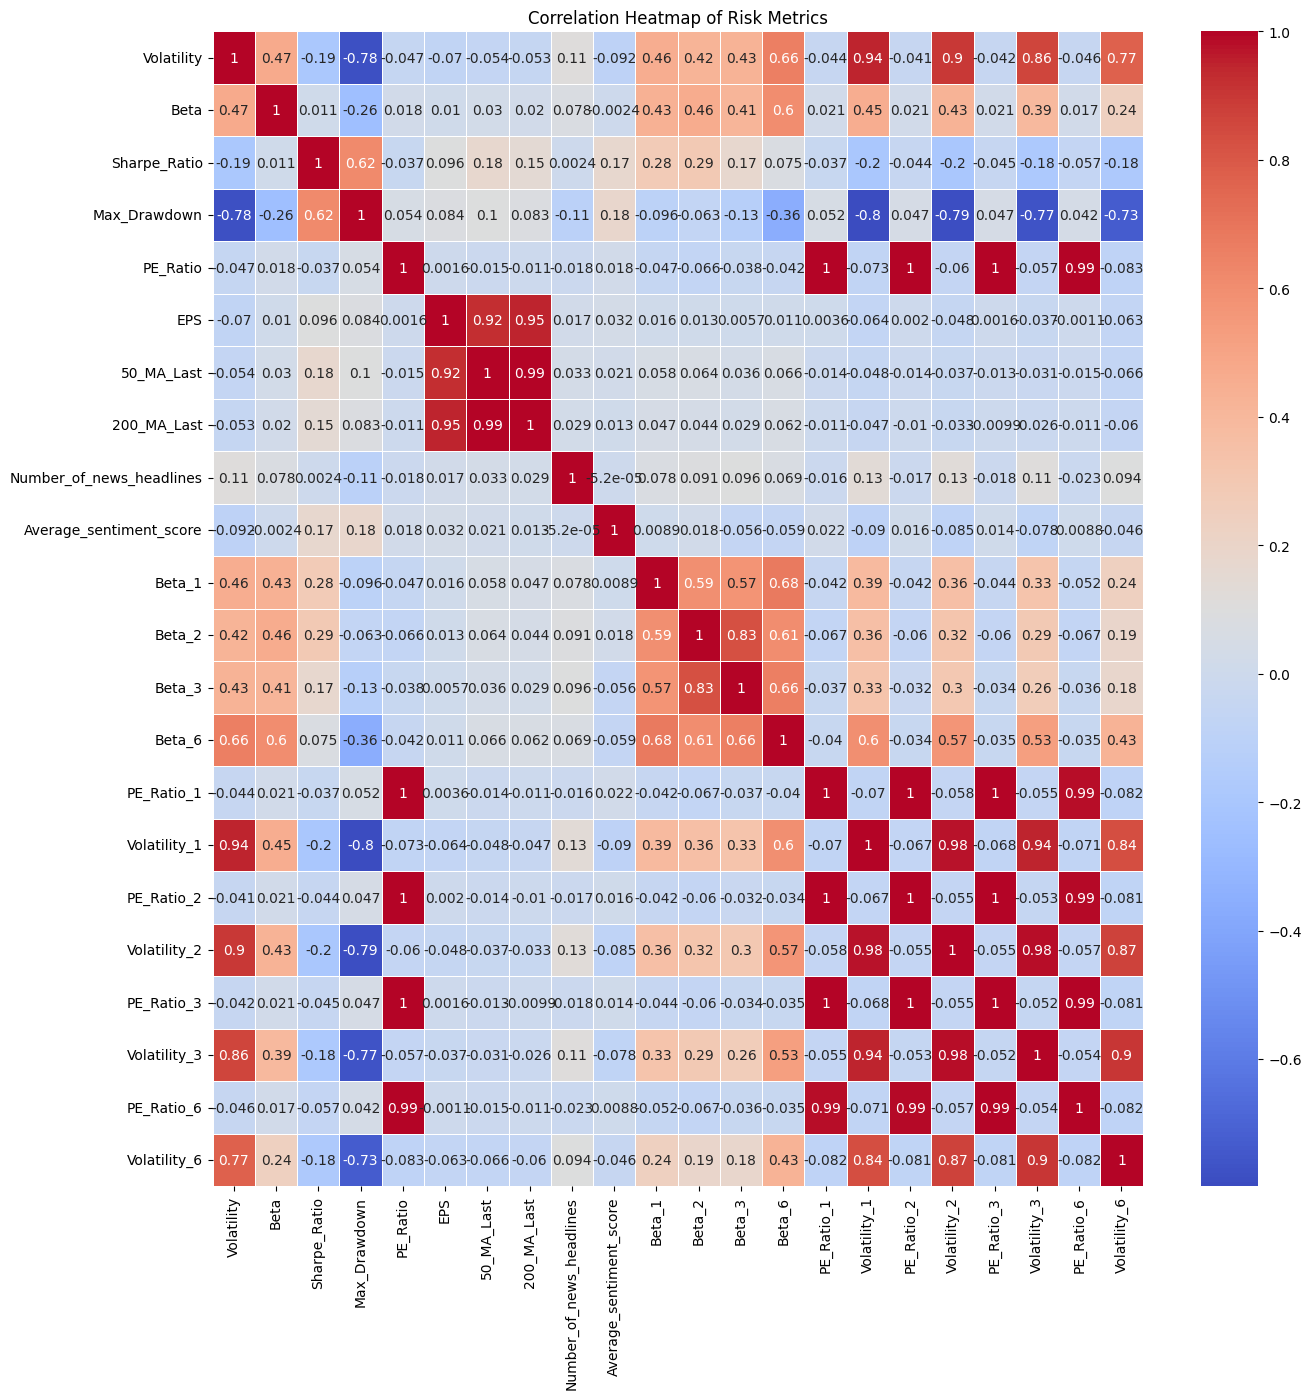

In [11]:
# Calculate correlation matrix
correlation_matrix=data.drop(columns=['Stock','Unnamed: 0'])
correlation_matrix = correlation_matrix.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Risk Metrics')
plt.show()

Volatility and Max_Drawdown: There is a strong negative correlation (-0.77) between Volatility and Max_Drawdown. This indicates that stocks with higher volatility tend to have larger maximum drawdowns.

Sharpe_Ratio and Max_Drawdown: There is a moderate positive correlation (0.63) between Sharpe_Ratio and Max_Drawdown. This suggests that stocks with higher Sharpe ratios tend to have smaller maximum drawdowns.

EPS, 50_MA_Last, and 200_MA_Last: There are strong positive correlations among Earnings Per Share (EPS), the 50-day Moving Average (50_MA_Last), and the 200-day Moving Average (200_MA_Last). This indicates that these metrics tend to move together.

Revenue_Growth: Revenue Growth shows relatively low correlations with most other metrics, suggesting it may be largely independent of the measured risk factors.

Beta: Beta exhibits weak correlations with most other metrics. Its highest correlation is with volatility (0.37)

Sentiment Score and Number of News Headlines: The average sentiment score has a slight positive correlation with the Sharpe Ratio and Max Drawdown, whereas Number of News Headlines has a slight positive correlation with Volatility.

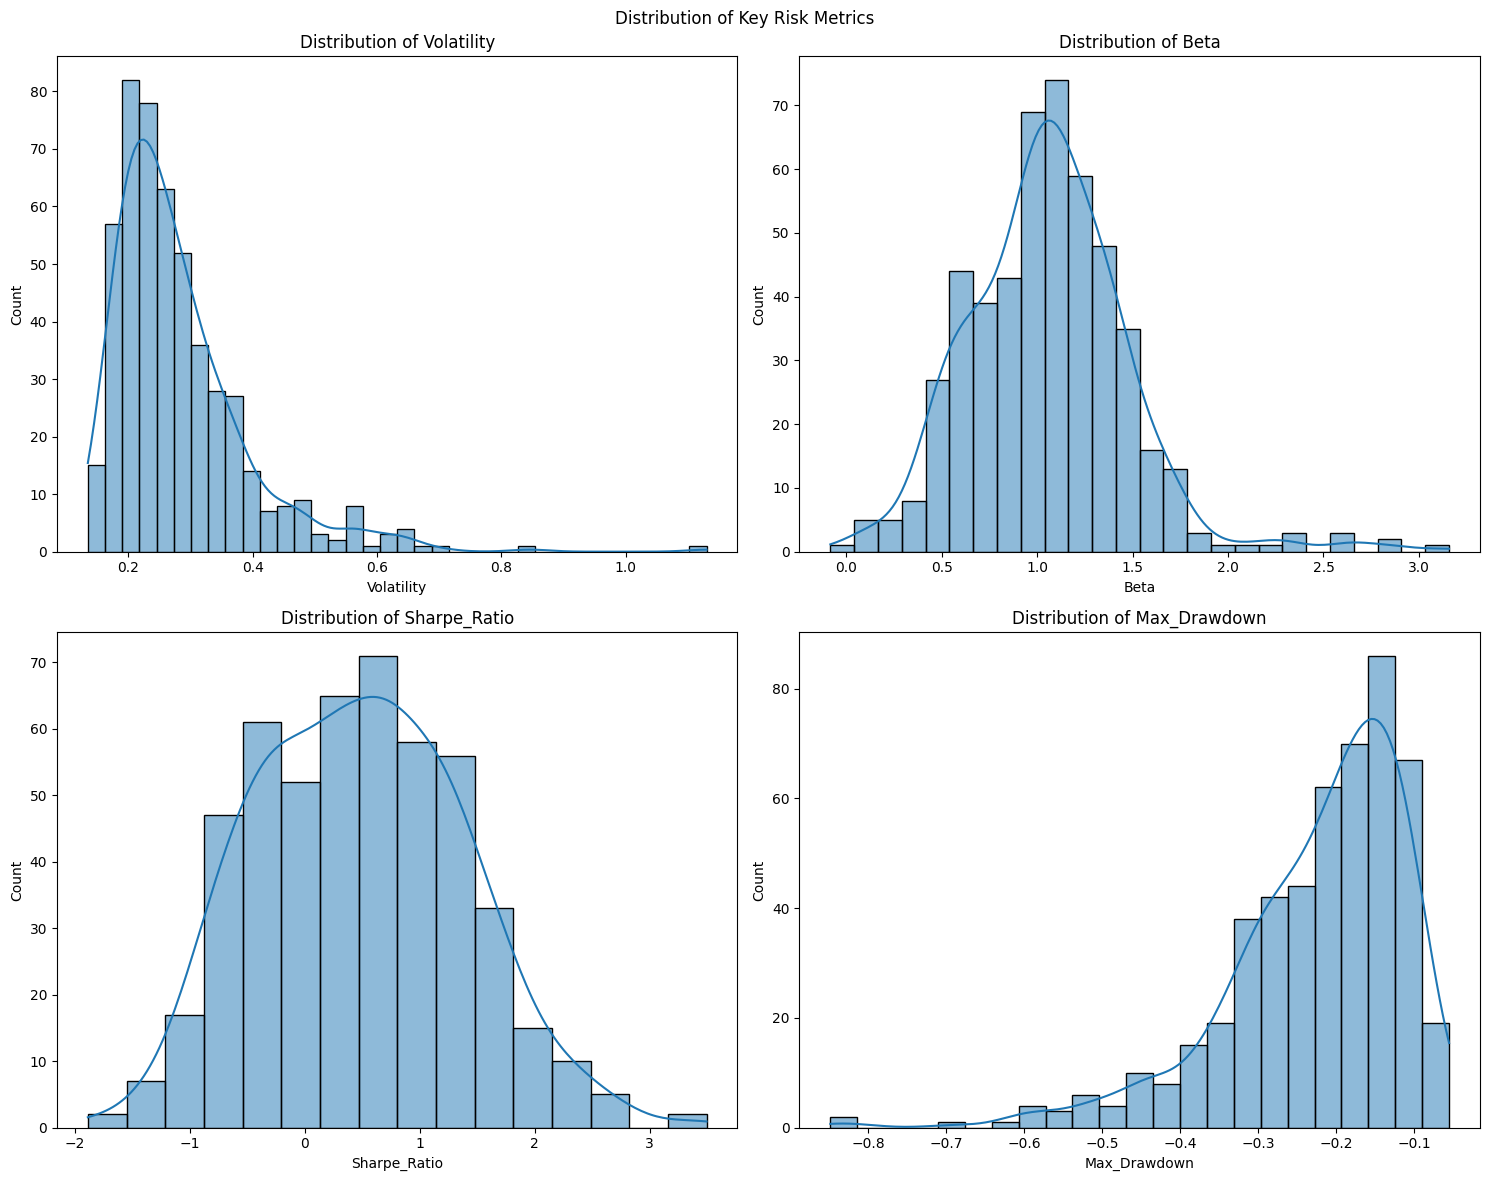

In [7]:
# Create histograms for key metrics
metrics = ['Volatility', 'Beta', 'Sharpe_Ratio', 'Max_Drawdown']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Risk Metrics')

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    sns.histplot(data[metric], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {metric}')
    axes[row, col].set_xlabel(metric)

plt.tight_layout()
plt.show()

Volatility: The distribution of volatility is right-skewed, indicating that most stocks have relatively low volatility, but a few have significantly higher volatility. This suggests that the portfolio contains mostly low-risk stocks, but there are some outliers that contribute more to overall risk.

Beta: The distribution of Beta is approximately normal, with a mean around 1. This indicates that, on average, the stocks in the portfolio move in line with the market. There are stocks with both higher and lower betas, representing a range of market sensitivities.

Sharpe Ratio: The distribution of Sharpe Ratio is approximately normal, centered slightly above zero. This suggests that, on average, the stocks in the portfolio provide a positive risk-adjusted return.

Max Drawdown: The distribution of Max Drawdown is left-skewed, with most stocks having relatively small maximum drawdowns. However, there are some stocks with significantly larger drawdowns, which could pose a risk to the portfolio's overall performance.

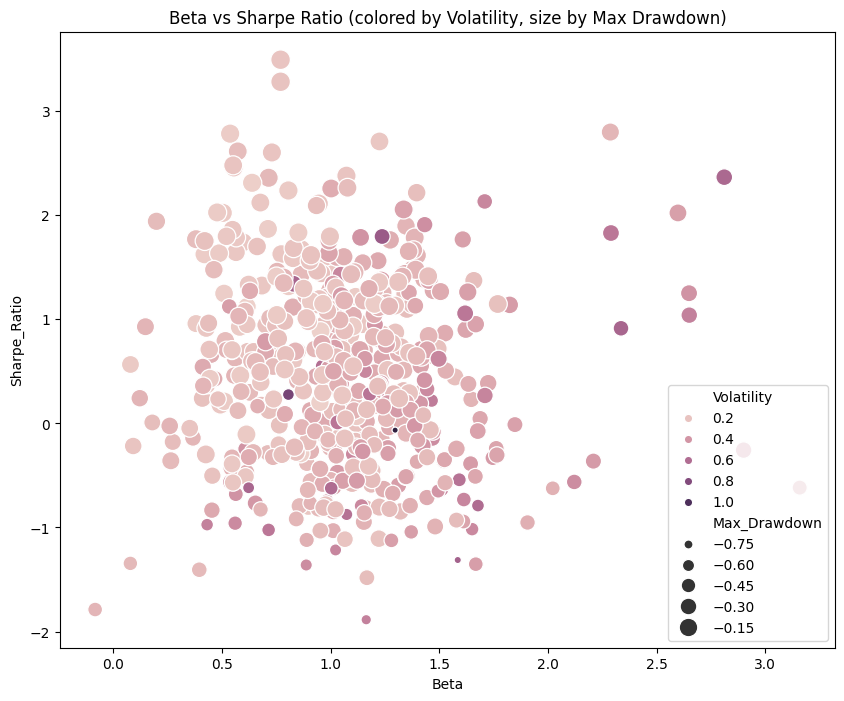

In [9]:
# Create scatter plots for selected pairs of metrics
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='Beta', y='Sharpe_Ratio', hue='Volatility', size='Max_Drawdown', sizes=(20, 200))
plt.title('Beta vs Sharpe Ratio (colored by Volatility, size by Max Drawdown)')
plt.show()

Scatter Plot: Beta vs. Sharpe Ratio
General Relationship:

There is no strong linear relationship between Beta and Sharpe Ratio in this scatter plot.

Stocks with low Beta (less volatile) tend to cluster around moderate to high Sharpe Ratios, indicating better risk-adjusted returns.

Stocks with higher Beta (>1) show more variability in Sharpe Ratios, suggesting mixed performance.

Volatility (Color):

Higher-volatility stocks (darker colors) are scattered across the plot but tend to have lower Sharpe Ratios on average.

This indicates that increased volatility does not necessarily lead to better risk-adjusted returns.

Max Drawdown (Size):

Larger points (greater Max Drawdown) are associated with lower Sharpe Ratios and higher Betas.

This suggests that riskier stocks (higher Beta and volatility) tend to experience larger drawdowns and poorer risk-adjusted returns.

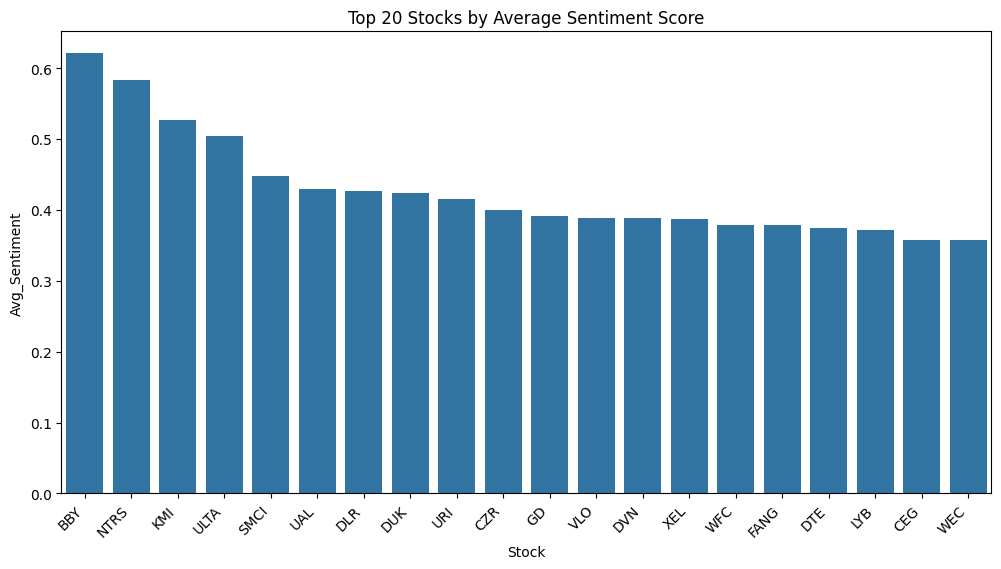

In [ ]:
# Calculate average sentiment score for each stock
data['Avg_Sentiment'] = data['Sentiment_Score'].apply(lambda x: sum(eval(x)) / len(eval(x)))

# Create a bar plot of average sentiment scores
plt.figure(figsize=(12, 6))
sns.barplot(data=data.nlargest(20, 'Avg_Sentiment'), x='Stock', y='Avg_Sentiment')
plt.title('Top 20 Stocks by Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.show()